<a href="https://colab.research.google.com/github/kevincong95/cs231n-emotiw/blob/master/notebooks/audio/1.0-la-audio-error-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/kevincong95/cs231n-emotiw.git'

Cloning into 'cs231n-emotiw'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 755 (delta 42), reused 30 (delta 16), pack-reused 683
Receiving objects: 100% (755/755), 175.26 MiB | 36.97 MiB/s, done.
Resolving deltas: 100% (450/450), done.


## Retrieve and Preprocess the Raw Data

In [0]:
# Switch to TF 1.x and navigate to the directory
%tensorflow_version 1.x
!pwd
import os
os.chdir('cs231n-emotiw')
!pwd

# Install required packages 
!pip install -r 'requirements-predictions.txt'

In [0]:
!wget 'https://storage.googleapis.com/cs231n-emotiw/data/Train_labels.txt'
!wget 'https://storage.googleapis.com/cs231n-emotiw/data/Val_labels.txt'
!wget 'https://storage.googleapis.com/cs231n-emotiw/data/train-full.zip'
!wget 'https://storage.googleapis.com/cs231n-emotiw/data/val-full.zip'

In [0]:
!unzip '/content/cs231n-emotiw/val-full.zip'


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import os
os.chdir('/content/cs231n-emotiw')

In [3]:
from src.preprocessors.audio_preprocessor import AudioPreprocessor
audio_preprocessor_val = AudioPreprocessor(video_folder='Val/' , output_folder='val-full-4/' , label_path='./Val_labels.txt')

Using TensorFlow backend.


Video Preprocessor created with video_folder = Val/ , output_folder = val-full-4/, output_file = None
Frames will be created with hop_size = 0.5


In [0]:
audio_preprocessor_val.preprocess(batch_size=32)

## Retrieve Preprocessed Data

In [0]:
!cp '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/val-final-audio.zip' '/content/'

In [0]:
!unzip val-final-audio.zip

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
#X_train = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final/audio-pickle-all-X-openl3-train.pkl', allow_pickle=True)
#Y_train = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final/audio-pickle-all-Y-openl3-train.pkl' , allow_pickle=True)

X_val = np.load('/content/cs231n-emotiw/val-full-4/audio-pickle-all-X-openl3.pkl' , allow_pickle=True)
Y_val = np.load('/content/cs231n-emotiw/val-full-4/audio-pickle-all-Y-openl3.pkl' , allow_pickle=True)

s = np.arange(X_val.shape[0])
np.random.shuffle(s)
X_val = X_val[s]
Y_val = Y_val[s]

video_path = '/content/cs231n-emotiw/Val/'
videos = glob.glob(video_path + '/*.mp4')
videos = np.asarray(videos)
videos = videos[s]

In [0]:
!cp '/content/cs231n-emotiw/val-full-4/audio-pickle-all-X-openl3.pkl' '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw'
!cp '/content/cs231n-emotiw/val-full-4/audio-pickle-all-Y-openl3.pkl' '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw'

## Retrieve Model and Predict/Evaluate

In [0]:
import tensorflow as tf

In [108]:
!wget 'https://storage.googleapis.com/cs231n-emotiw/models/openl3-cnn-lstm-tuned-lr.h5'

--2020-06-02 15:54:05--  https://storage.googleapis.com/cs231n-emotiw/models/openl3-cnn-lstm-tuned-lr.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 2607:f8b0:400c:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17223968 (16M) [application/octet-stream]
Saving to: ‘openl3-cnn-lstm-tuned-lr.h5.2’

openl3-cnn-lstm-tun 100%[===================>]  16.43M  82.0MB/s    in 0.2s    

2020-06-02 15:54:05 (82.0 MB/s) - ‘openl3-cnn-lstm-tuned-lr.h5.2’ saved [17223968/17223968]



In [127]:
model = tf.keras.models.load_model('openl3-cnn-lstm-tuned-lr.h5')

In [128]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 6144)]      0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          786496    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 64)          256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 512)         66048     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 512)         2048  

In [140]:
print(X_val.shape)

(766, 11, 6144)


## Evaluate Model Performance

In [0]:
predictions = model.predict(X_val)

In [155]:
model.evaluate(X_val , Y_val)

24/24 [==============================] - 0s 8ms/step - loss: 1.0272 - accuracy: 0.5770


[1.0272266864776611, 0.5770235061645508]

#### F1 Score


In [115]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_val)
Y_class = y_pred.argmax(axis=-1)
f1_score(Y_val, Y_class, average='micro')

0.577023498694517

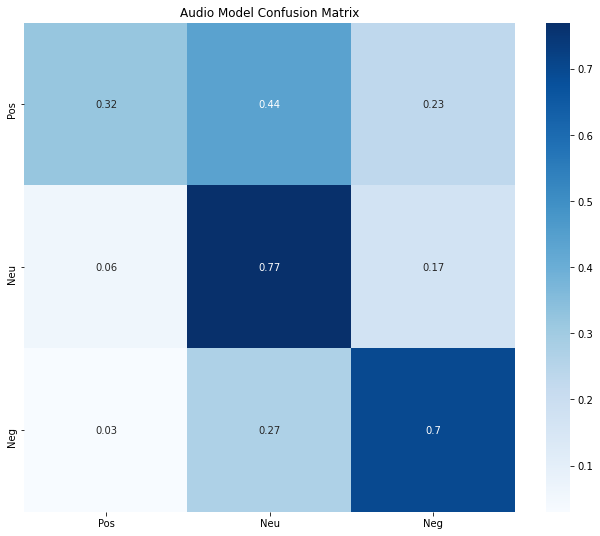

In [119]:
from sklearn import metrics 
import pandas as pd
import seaborn as sn

import matplotlib.pyplot as plt


classes=['Pos' , 'Neu' , 'Neg'] 

con_mat = tf.math.confusion_matrix(labels=Y_val, predictions=Y_class).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                  index = classes, 
                  columns = classes)


figure = plt.figure(figsize=(11, 9))
plt.title("Audio Model Confusion Matrix")
sn.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)

## Visualize some of the Embeddings on a per frame basis

In [0]:
import matplotlib.pyplot as plt
import cv2

class_names = ["Positive" , "Neutral" , "Negative"]
def plot_embeddings(i, time_point, predictions_array, true_label, embeddings):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])


  embed_sqr = np.concatenate([embeddings[i][time_point]]*embeddings.shape[2])
  embed_sqr = cv2.resize(embed_sqr, (28, 28))

  plt.imshow(embed_sqr, cmap=plt.cm.binary)



  predicted_label = np.argmax(predictions_array[i])
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

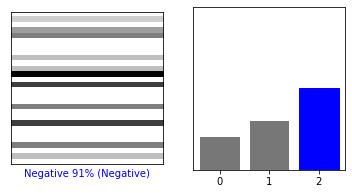

In [132]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_embeddings(i , 1 , predictions, Y_val , X_val)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_val)
plt.show()

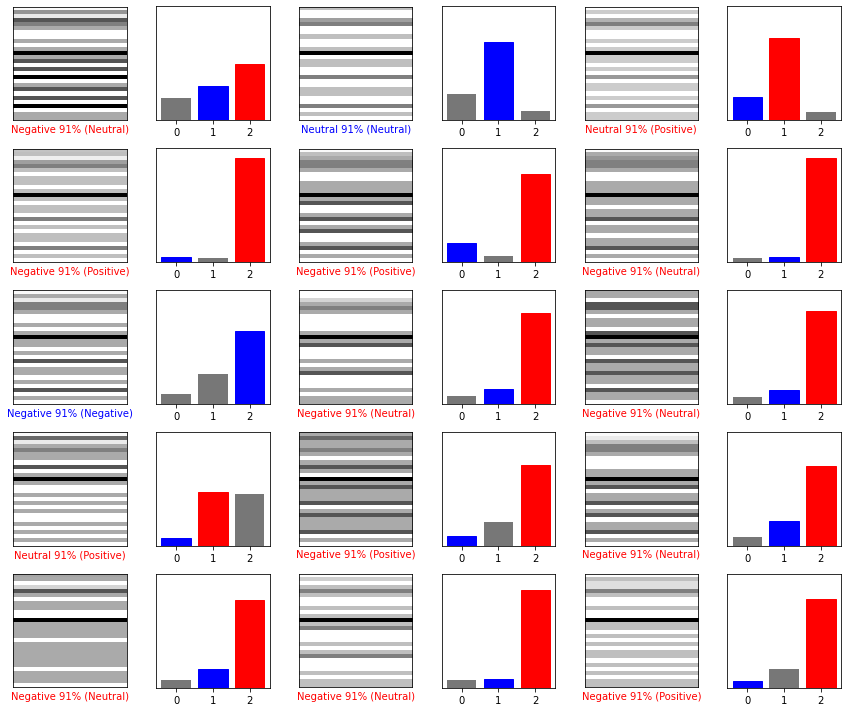

In [161]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3


num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_embeddings(i , 1 , predictions, Y_val , X_val)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  Y_val)
plt.tight_layout()
plt.show()

## Visualize the input spectrograms and how they affect predictions


mkdir: cannot create directory ‘/content/cs231n-emotiw/Val/tmp’: File exists
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


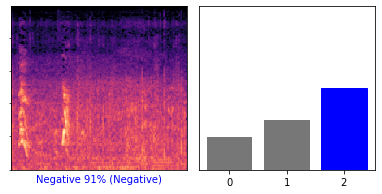

In [148]:
# TO DO
import librosa
import librosa.display
from librosa.feature import melspectrogram
import sys
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_audio
import soundfile as sf

!mkdir '/content/cs231n-emotiw/Val/tmp'

files = sorted(glob.glob('/content/cs231n-emotiw/Val/*.mp4'))

def plot_spectrogram(i, video_path, video_name , predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  output_wav_file = video_name[:-3] + 'extracted_audio.wav'
  ffmpeg_extract_audio(video_path + video_name, video_path + "/tmp/" + output_wav_file)
  y, sr = librosa.load(video_path + "/tmp/" + output_wav_file)
  S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                      fmax=8000)
  S_dB = librosa.power_to_db(S, ref=np.max)

  librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=sr,
                            fmax=8000)

  #plt.colorbar(format='%+2.0f dB')
  #plt.title('Mel-frequency spectrogram')
  plt.tight_layout()
  plt.yticks([])
  plt.xticks([])
  plt.ylabel("")



  predicted_label = np.argmax(predictions_array[i])


  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

video_name = '/content/cs231n-emotiw/Val/100_1.mp4'
video_path = '/content/cs231n-emotiw/Val/'
video_name = os.path.basename(video_name)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_spectrogram(0 , video_path , video_name , predictions, Y_val)
plt.subplot(1,2,2)
plot_value_array(0, predictions[0],  Y_val)
plt.show()

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

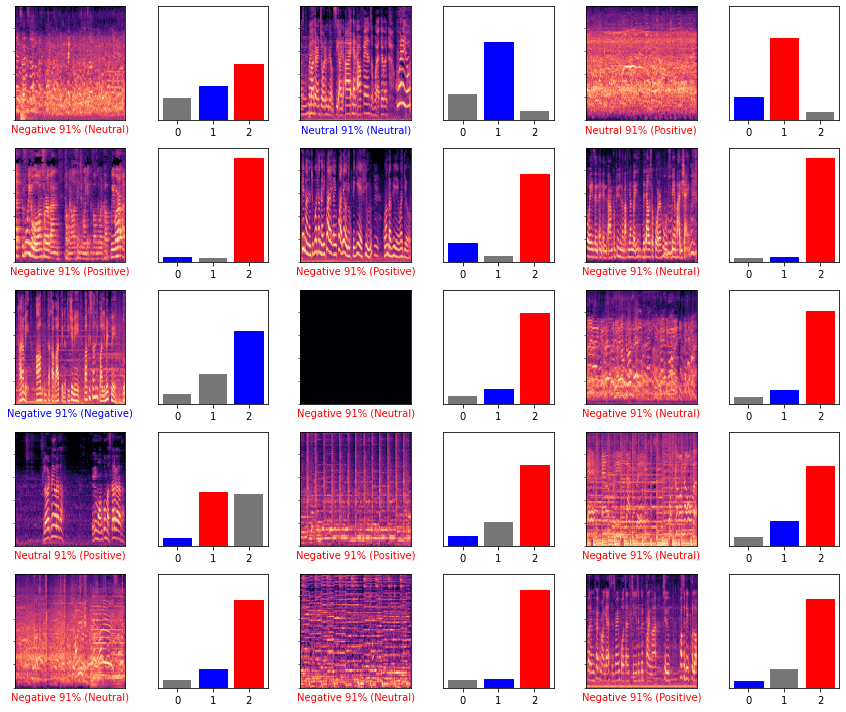

In [160]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
import glob
num_rows = 5
num_cols = 3


num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  video_name = os.path.basename(videos[i])
  plot_spectrogram(i , video_path , video_name , predictions, Y_val)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  Y_val)
plt.tight_layout()
plt.show()